# <font color='blue'><center><u>LOGISTIC REGRESSION</u></center></font>

.

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).



## Problem statement:

#### Telecom Churn Case Study

With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, this is referred to as churning and not churning, respectively.



### Importing and Merging Data



In [ ]:
# Importing Pandas and NumPy
import numpy as np
import pandas as pd


In [ ]:
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')
# to view all rows and columns of dataset
pd.set_option("display.max_columns", None)

In [ ]:
# Importing all datasets
churn_data = pd.read_csv('churn_data.csv')
customer_data = pd.read_csv('customer_data.csv')
internet_data = pd.read_csv('internet_data.csv')

In [ ]:
churn_data.head(1)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [ ]:
customer_data.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No


In [ ]:
internet_data.head(1)

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No


In [ ]:
# dataset dimensions
churn_data.shape

(7043, 9)

In [ ]:
# dataset dimensions
customer_data.shape

(7043, 5)

In [ ]:
# dataset dimensions
internet_data.shape

(7043, 9)

In [ ]:
#Merging churn_data and customer_data on 'customerID' using inner join on customerID
df_1 =  pd.merge(churn_data,customer_data,how='inner',on='customerID')

In [ ]:
# dataset dimensions after merging
df_1.shape

(7043, 13)

In [ ]:
#Final dataframe with all predictor variables (merging df_1 and internet_data on 'customerID')
telecom = pd.merge(df_1,internet_data,how='inner',on='customerID')

In [ ]:
# dataset dimensions after merging
telecom.shape

(7043, 21)

### Let's understand the structure of our dataframe



In [ ]:
# Let's see the head of our master dataset
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [ ]:
#Lets see statistical description for our master data
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [ ]:
# Let's see the type of each column
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


## Data Preparation



In [ ]:
# Converting Yes to 1 and No to 0 using map
telecom['PhoneService'] = telecom['PhoneService'].map({'Yes': 1, 'No' :0})
telecom['PaperlessBilling'] = telecom['PaperlessBilling'].map({'Yes':1,"No":0})
telecom['Churn'] = telecom['Churn'].map({'Yes':1,"No":0})
telecom['Partner'] = telecom['Partner'].map({'Yes':1,'No':0})
telecom['Dependents'] = telecom['Dependents'].map({'Yes':1,'No':0})

### Dummy Variable Creation

As you can see there are many textual information in our data set. Lets do encoding for these classes using get_dummies() function.

Note: use prefix='column_name' where column_name is the column whose encoding has to be done.

In [ ]:
# Creating a dummy variable for the variable 'Contract' and keeping drop_first=True
cont = pd.get_dummies(telecom['Contract'],prefix= 'Contract',drop_first=True)
#Adding the results to the master dataframe i.e telecom
telecom = pd.concat([telecom,cont], axis=1)

# Creating a dummy variable for the variable 'PaymentMethod' and keeping drop_first=True
pm = pd.get_dummies(telecom['PaymentMethod'], prefix='PaymentMethod',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,pm], axis=1)

# Creating a dummy variable for the variable 'gender' and keeping drop_first=True
gen = pd.get_dummies(telecom['gender'],prefix='gender',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,gen], axis=1)

# Creating a dummy variable for the variable 'MultipleLines' and keeping drop_first=True
ml = pd.get_dummies(telecom['MultipleLines'],prefix='MultipleLines')
# dropping MultipleLines_No phone service column from ml
ml1 = ml.drop('MultipleLines_No phone service', axis=1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom, ml1], axis=1)

# Creating a dummy variable for the variable 'InternetService' and keeping drop_first=True
iser = pd.get_dummies(telecom['InternetService'], prefix='InternetService',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,iser], axis=1)

# # Creating a dummy variable for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'],prefix='OnlineSecurity')
#drop OnlineSecurity_No internet service column from os
os1=  os.drop('OnlineSecurity_No internet service', axis=1)
#Adding os1 to the master dataframe
telecom = pd.concat([telecom, os1], axis=1)

# Creating a dummy variable for the variable 'OnlineBackup' and keeping drop_first=True
ob = pd.get_dummies(telecom['OnlineBackup'],prefix='OnlineBackup')
#dropping OnlineBackup_No internet service from ob
ob1 = ob.drop('OnlineBackup_No internet service', axis=1)
#Adding the results(ob1) to the master dataframe
telecom = pd.concat([telecom, ob1], axis=1)

# Creating a dummy variable for the variable 'DeviceProtection' and keeping drop_first=True
dp = pd.get_dummies(telecom['DeviceProtection'],prefix='DeviceProtection')
#dropping DeviceProtection_No internet service from dp
dp1 =  dp.drop('DeviceProtection_No internet service', axis=1)
#Adding the results(dp1) to the master dataframe
telecom = pd.concat([telecom, dp1], axis=1)

# Creating a dummy variable for the variable 'TechSupport' and keeping drop_first=True
ts = pd.get_dummies(telecom['TechSupport'],prefix='TechSupport')
#dropping TechSupport_No internet service from ts
ts1 = ts.drop('TechSupport_No internet service', axis=1)
#Adding the results(ts1) to the master dataframe
telecom = pd.concat([telecom, ts1], axis=1)

# Creating a dummy variable for the variable 'StreamingTV' and keeping drop_first=True
st = pd.get_dummies(telecom['StreamingTV'],prefix='StreamingTV')
#dropping StreamingTV_No internet service from st
st1 = st.drop('StreamingTV_No internet service', axis=1)
#Adding the results(st1) to the master dataframe
telecom = pd.concat([telecom, st1], axis=1)

# Creating a dummy variable for the variable 'StreamingMovies' and keeping drop_first=True 
sm = pd.get_dummies(telecom['StreamingMovies'],prefix='StreamingMovies')
#dropping StreamingMovies_No internet service from sm
sm1 = sm.drop('StreamingMovies_No internet service', axis=1)
#Adding the results(sm1) to the master dataframe
telecom = pd.concat([telecom, sm1], axis=1)

### Dropping the repeated variables

Since We have already created dummies for the below variables
    
    'Contract',
    'PaymentMethod',
    'gender',
    'MultipleLines',
    'InternetService', 
    'OnlineSecurity', 
    'OnlineBackup', 
    'DeviceProtection',
    'TechSupport', 
    'StreamingTV', 
    'StreamingMovies'
so we can drop them off as they are now repeated in our master dataset


In [ ]:
# drop all duplicate columns
telecom = telecom.drop(['Contract',
    'PaymentMethod',
    'gender',
    'MultipleLines',
    'InternetService', 
    'OnlineSecurity', 
    'OnlineBackup', 
    'DeviceProtection',
    'TechSupport', 
    'StreamingTV', 
    'StreamingMovies'], axis=1)

The TotalCharges variable was imported as a string we need to convert it to numeric type<br>
Hint: Use pandas.to_numeric() function.

In [ ]:
# convert to numeric
telecom['TotalCharges']= pd.to_numeric(telecom['TotalCharges'],errors='coerce')

In [ ]:
telecom.head(2)

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_No,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,NaN,NaN,29.85,29.85,NaN,0,NaN,NaN,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,NaN,NaN,56.95,1889.50,NaN,0,NaN,NaN,1,0,0,0,1,1,1,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0


In [ ]:
# again check data type informationof our master dataset
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

Now we can see we have all variables as integer.

### Checking for Outliers



Checking for outliers in the continuous variables like 'tenure','MonthlyCharges','SeniorCitizen','TotalCharges'


In [ ]:
# Getting all continues variables in separate dataframe
num_telecom = telecom[['tenure', 'MonthlyCharges','SeniorCitizen','TotalCharges']]

In [ ]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_telecom.describe(percentiles=[.25,.5,.75,.9,.95,.99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


From the distribution shown above, you can see that there no outliner in your data as the numbers are gradually increasing.

### Checking for Missing Values and Inputing Them



In [ ]:
# Checking total missing values (column-wise)
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
MultipleLines_No                          0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

In [ ]:
# Checking the percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom.index)),2)

customerID                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                

It means that 11/7043 = 0.001561834 i.e 0.15%, the best option to get rid of these null values in this scenario is to remove these observations from the analysis

In [ ]:
# Removing NaN form TotalCharges rows
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [ ]:
# Lets Check percentage of missing values after removing the missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

Now we don't have any missing values

### Feature Standardisation




Standardization is one of the scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

Here’s the formula for standardization:


![image.png](attachment:image.png)

![image-3.png](attachment:image-3.png)




In [ ]:
# Get telecom data type information
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   tenure                                 7032 non-null   int64  
 2   PhoneService                           7032 non-null   int64  
 3   PaperlessBilling                       7032 non-null   int64  
 4   MonthlyCharges                         7032 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7032 non-null   int64  
 7   SeniorCitizen                          7032 non-null   int64  
 8   Partner                                7032 non-null   int64  
 9   Dependents                             7032 non-null   int64  
 10  Contract_One year                      7032 non-null   uint8  
 11  Cont

In [ ]:
# Getting all desired continues variables like 'tenure','MonthlyCharges' and 'TotalCharges' into one dataframe.
df = telecom[['tenure','MonthlyCharges','TotalCharges']]

In [ ]:
# Standardising above continuous features

std_df= (df - df.mean())/df.std()

In [ ]:
# Dropping 'tenure','MonthlyCharges' and 'TotalCharges' from telecom as we want to add the standardised fetaures 
telecom = telecom.drop(['tenure','MonthlyCharges','TotalCharges'], axis=1)

In [ ]:
# Add std_df into telecom
telecom = pd.concat([telecom, std_df], axis=1)

In [ ]:
# print telecom tail
telecom.tail()

,customerID,PhoneService,PaperlessBilling,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_No,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
7038,6840-RESVB,1,1,0,0,1,1,1,0,0,0,1,1,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0,1,-0.343113,0.664821,-0.129171
7039,2234-XADUH,1,1,0,0,1,1,1,0,1,0,0,0,0,1,1,0,1,0,0,1,0,1,1,0,0,1,0,1,1.612459,1.276402,2.240896
7040,4801-JZAZL,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,-0.872746,-1.169921,-0.854453
7041,8361-LTMKD,1,1,1,1,1,0,0,0,0,0,1,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,-1.157934,0.319145,-0.872033
7042,3186-AJIEK,1,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,1.368012,1.357835,2.012201


### Checking the Churn Rate




In [ ]:
#caluclating total churn percentage in our master dataframe
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100

In [ ]:
# print churn
churn

26.578498293515356

We have almost 27% churn rate

## Model Building


Let's start by splitting our data into a training set and a test set.

In [ ]:
# Putting feature variable to X. drop 'customerID' from features as its not informative for our prediction
X = telecom.drop(['Churn','customerID'], axis=1)

# Putting response variable to y
y = telecom['Churn']

In [ ]:
# print y head
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

### Running Your First Training Model

In [ ]:
# import statsmodels api as sm
import statsmodels.api as sm

Statsmodels provides a Logit() function for performing logistic regression. The Logit() function accepts y and X as parameters and returns the Logit object. The model is then fitted to the data.


### Splitting Data into Training and Test Sets

In [ ]:
# import train_test_split module
from sklearn.model_selection import train_test_split

In [ ]:
# adding constant to X
X= sm.add_constant(X)
# Splitting the data into train and test with train_size=0.7 and random_state=100
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size= 0.7,test_size=0.3, random_state=100)


In [ ]:
# Logistic regression model
logm1 = sm.Logit(y_train,X_train)

#fitting and printing summary
logm1.fit().summary()

         Current function value: 0.407291
         Iterations: 35


C:\Users\gunja\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4897
Method:                           MLE   Df Model:                           24
Date:                Mon, 04 Oct 2021   Pseudo R-squ.:                  0.2912
Time:                        14:58:38   Log-Likelihood:                -2004.7
converged:                      False   LL-Null:                       -2828.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.8229        nan        nan        nan         nan         nan
PhoneService                              1.4148        nan        nan        nan         nan         nan
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
MultipleLines_No                         -0.4641        nan        nan        nan         nan         nan
MultipleLines_Yes                         0.0983        nan        nan        nan         nan         nan
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -4.8901        nan        nan        nan         nan         nan
OnlineSecurity_No                        -4.6149   2.59e+06  -1.78e-06      1.000   -5.08e+06    5.08e+06
OnlineSecurity_Yes                       -4.6394   2.61e+06  -1.78e-06      1.000   -5.11e+06    5.11e+06
OnlineBackup_No                           2.1219        nan        nan        nan         nan         nan
OnlineBackup_Yes                          2.2959   1.46e+05   1.57e-05      1.000   -2.86e+05    2.86e+05
DeviceProtection_No                       0.2575   3.36e+06   7.66e-08      1.000   -6.59e+06    6.59e+06
DeviceProtection_Yes                      0.5804   3.35e+06   1.73e-07      1.000   -6.57e+06    6.57e+06
TechSupport_No                            1.0960        nan        nan        nan         nan         nan
TechSupport_Yes                           1.0655        nan        nan        nan         nan         nan
StreamingTV_No                           -0.6255        nan        nan        nan         nan         nan
StreamingTV_Yes                           0.3343        nan        nan        nan         nan         nan
StreamingMovies_No                       -0.3459        nan        nan        nan         nan         nan
StreamingMovies_Yes                       0.5024        nan  

From above you can see that there few statistically insignificant variables present in our dataset. Lets drop them off.

Here drop those variables which has less than 70% confidence to reject the null hyposthesis looking into P values.

Few insignificant variables we can see from above stats summary are:
 
    partner
    Dependents	
    PaymentMethod_Electronic check	
    gender_Male
    InternetService_No
    DeviceProtection_no
    DeviceProtection_Yes
    
So lets drop them off from X

Note: We are not dropping const variable as it is required for OLS model building

In [ ]:
# drop above features from X
X.drop(['Partner','Dependents','PaymentMethod_Electronic check',   
'gender_Male',
'InternetService_No',
'DeviceProtection_No',
'DeviceProtection_Yes'], axis = 1, inplace=True)

### Correlation Matrix



In [ ]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

<AxesSubplot:>

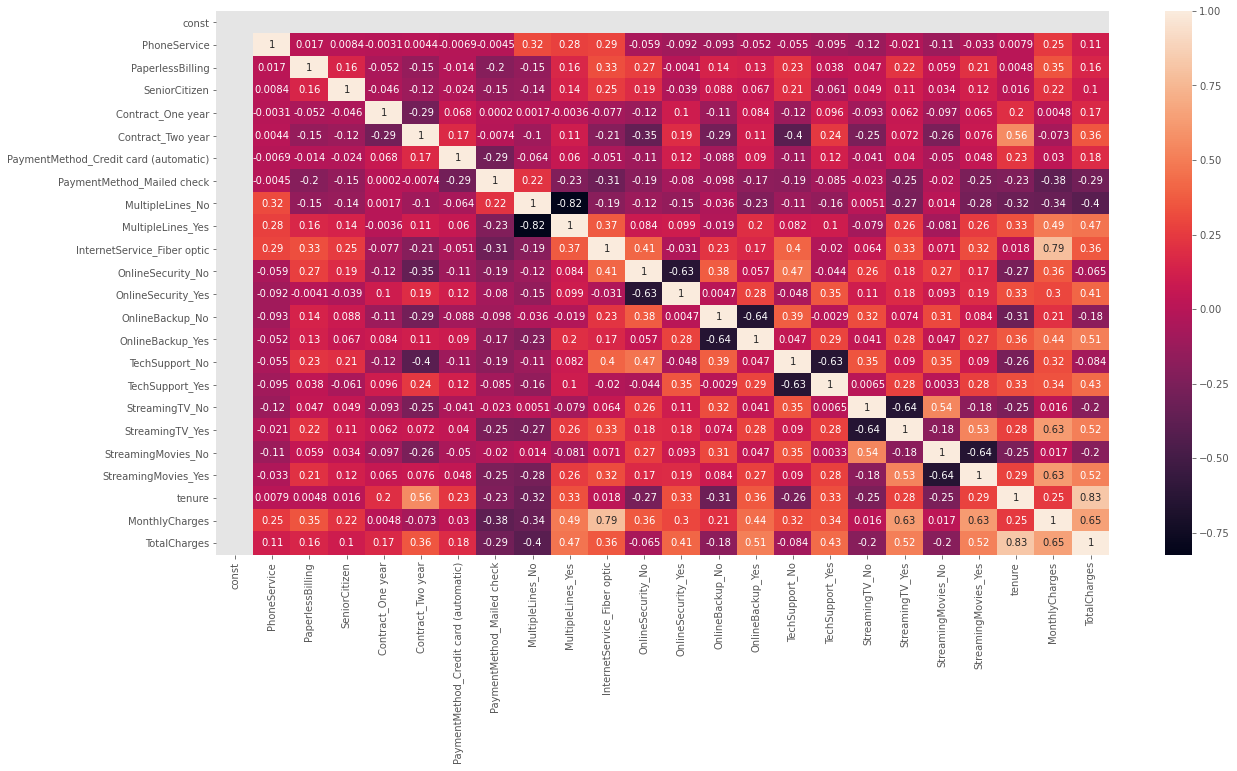

In [ ]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X.corr(), annot=True)

### Dropping highly correlated variables.



In [ ]:
# Write a correlation function to  remove highly correlated variables (>70%)
def correlation(dataset, threshold):
    col_corr = set() # set for all correlated columns 
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:   # comparing absolute corr_value with threshold
                col_name = corr_matrix.columns[i]   # getting the name of columns
                col_corr.add(col_name)       
    return col_corr

In [ ]:
#get correlation function output with dataset as X and threshold as 0.7
corr_features = correlation(X,0.7)

# print length of corr_features
len(corr_features)

3

In [ ]:
#print corr_features
corr_features


{'MonthlyCharges', 'MultipleLines_Yes', 'TotalCharges'}

In [ ]:
# Lets drop the above variables from X

X.drop(['MonthlyCharges', 'MultipleLines_Yes', 'TotalCharges'], axis=1, inplace=True)

## Dropping Variable with high VIF




Lets check multicollinearity using Variance inflation factor too!


In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# empty dataframe
vif= pd.DataFrame()

#variables names with all variables in column X
vif["variables"] = X.columns

# Vif scores for corresponding features
vif["VIF"] = [round(variance_inflation_factor(X.values,i),2) for i in range(X.shape[1])]

In [ ]:
# print vif
vif.sort_values(by = 'VIF')

,variables,VIF
3,SeniorCitizen,1.11
6,PaymentMethod_Credit card (automatic),1.17
2,PaperlessBilling,1.21
7,PaymentMethod_Mailed check,1.37
1,PhoneService,1.45
8,MultipleLines_No,1.46
4,Contract_One year,1.60
9,InternetService_Fiber optic,1.99
5,Contract_Two year,2.59
20,tenure,2.63


Lets drop variables which are having infinite vif scores.

they are:
    
    OnlineSecurity_No
    OnlineSecurity_Yes
    OnlineBackup_No
    OnlineBackup_Yes
    TechSupport_No
    TechSupport_Yes
    StreamingTV_No
    StreamingTV_Yes
    StreamingMovies_No
    StreamingMovies_Yes

In [ ]:
# Lets drop above variables also from X
X.drop(['OnlineSecurity_No','OnlineSecurity_Yes','OnlineBackup_No','OnlineBackup_Yes','TechSupport_No',
        'TechSupport_Yes','StreamingTV_No','StreamingTV_Yes','StreamingMovies_No','StreamingMovies_Yes'],
       axis=1, inplace=True)



### Checking the Correlation Matrix again

After dropping highly correlated variables now let's check the correlation matrix again.

<AxesSubplot:>

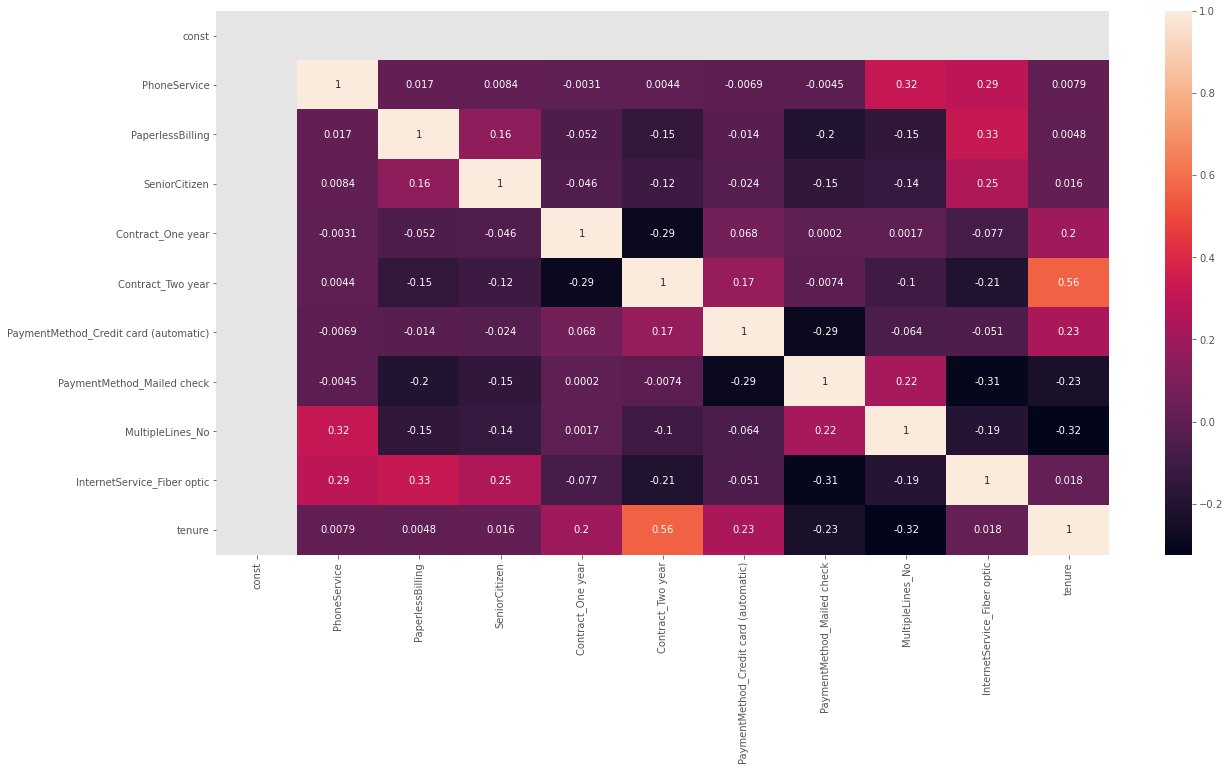

In [ ]:
#plot heatmap
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X.corr(), annot=True)


### Re-Running the Model

<p style='text-align: right;'> 3 points</p>


Now let's run our model again after dropping highly correlated variables

In [ ]:
# Splitting the data into train and test with train_size=0.7 and random_state=100 again
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100)

# building model again
logm2 = sm.Logit(y_train, X_train)

#fitting model and printing summary
logm2.fit().summary()


Optimization terminated successfully.
         Current function value: 0.417905
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4911
Method:                           MLE   Df Model:                           10
Date:                Mon, 04 Oct 2021   Pseudo R-squ.:                  0.2727
Time:                        15:58:51   Log-Likelihood:                -2056.9
converged:                       True   LL-Null:                       -2828.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.2686      0.151     -8.421      0.000      -1.564      -0.973
PhoneService                             -0.4334      0.156     -2.771      0.006      -0.740      -0.127
PaperlessBilling                          0.4239      0.088      4.831      0.000       0.252       0.596
SeniorCitizen                             0.4801      0.099      4.830      0.000       0.285       0.675
Contract_One year                        -0.7379      0.124     -5.973      0.000      -0.980      -0.496
Contract_Two year                        -1.4344      0.203     -7.076      0.000      -1.832      -1.037
PaymentMethod_Credit card (automatic)    -0.4385      0.112     -3.927      0.000      -0.657      -0.220
PaymentMethod_Mailed check               -0.4864      0.107     -4.560      0.000      -0.695      -0.277
MultipleLines_No                         -0.3268      0.094     -3.487      0.000      -0.511      -0.143
InternetService_Fiber optic               1.2979      0.099     13.065      0.000       1.103       1.493
tenure                                   -0.9134      0.063    -14.468      0.000      -1.037      -0.790
=========================================================================================================
"""

Now you can see after removing all multicollinear features we got all P values to zero,  so now we can say that all features are statistically significant.

### Feature Selection Using RFE




Lets do feature selection using LogisticRegression with RFE

In [ ]:
# import RFE and LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Initiate LogisticRegression()
logreg = LogisticRegression()

 # Initialise RFE 
rfe =  RFE(logreg)

# fitting RFE 
rfe = rfe.fit(X,y)

# Printing the boolean results
print(rfe.support_)     
# Printing the ranking
print(rfe.ranking_)           

[False  True False False  True  True False False False  True  True]
[7 1 2 6 1 1 5 4 3 1 1]


In [ ]:
# printing column names which were suppported by RFE
X.columns[(rfe.support_)]

Index(['PhoneService', 'Contract_One year', 'Contract_Two year',
       'InternetService_Fiber optic', 'tenure'],
      dtype='object')

In [ ]:
# Variables selected by RFE 
col = ['PhoneService', 'Contract_One year', 'Contract_Two year',
       'InternetService_Fiber optic', 'tenure']

In [ ]:
# Let's run the model using the selected variables but this time we will use Logistic Regression

#initialise Logistic Regression
logsk = LogisticRegression()

#fitting model using above columns as input
logsk.fit(X_train[col], y_train)

LogisticRegression()

In [ ]:
#recreating the model with StatsModels with RFE selecte columns

logm3 = sm.Logit(y_train, X_train[col])

# Fitting and printing model summary
logm3.fit().summary()

Optimization terminated successfully.
         Current function value: 0.435736
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4917
Method:                           MLE   Df Model:                            4
Date:                Mon, 04 Oct 2021   Pseudo R-squ.:                  0.2417
Time:                        16:10:00   Log-Likelihood:                -2144.7
converged:                       True   LL-Null:                       -2828.2
Covariance Type:            nonrobust   LLR p-value:                1.009e-294
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
PhoneService                   -1.6604      0.085    -19.428      0.000      -1.828      -1.493
Contract_One year              -1.2033      0.115    -10.497      0.000      -1.428      -0.979
Contract_Two year              -2.1243      0.192    -11.050      0.000      -2.501      -1.748
InternetService_Fiber optic     1.6316      0.089     18.334      0.000       1.457       1.806
tenure                         -0.6128      0.053    -11.648      0.000      -0.716      -0.510
===============================================================================================
"""

### Making Predictions



In [ ]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_test[col])

In [ ]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [ ]:
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

In [ ]:
# Let's see the head
y_pred_1.head()

,1
0,0.534503
1,0.292735
2,0.013463
3,0.700441
4,0.022563


In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [ ]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [ ]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)



In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1], axis=1)

In [ ]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={1:'churn_prob'})

In [ ]:
#printing y_pred_final
y_pred_final

,Churn,CustID,churn_prob
0,0,942,0.534503
1,1,3730,0.292735
2,0,1761,0.013463
3,1,2283,0.700441
4,0,1872,0.022563
...,...,...,...
2105,0,1289,0.024736
2106,0,3508,0.049254
2107,0,6765,0.009619
2108,0,3598,0.298253


In [ ]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['CustID','Churn','churn_prob'])

In [ ]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Churn,churn_prob
0,942,0,0.534503
1,3730,1,0.292735
2,1761,0,0.013463
3,2283,1,0.700441
4,1872,0,0.022563


In [ ]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.churn_prob.map(lambda x: 1 if x > 0.5 else 0)

In [ ]:
# Let's see the head
y_pred_final.head()


,CustID,Churn,churn_prob,predicted
0,942,0,0.534503,1
1,3730,1,0.292735,0
2,1761,0,0.013463,0
3,2283,1,0.700441,1
4,1872,0,0.022563,0


### Model Evaluation




Choosing the right metric is very important in any classification problem.



Lets check Confusion matrix for model evaluation


In [ ]:
# import metrics 
from sklearn import metrics

In [ ]:
# Lets check what all things python provides us in confusion matrix using help function.

help(metrics.confusion_matrix)

Help on function confusion_matrix in module sklearn.metrics._classification:

confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
    Compute confusion matrix to evaluate the accuracy of a classification.
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    labels : array-like of shape (n_classes), default=

In [ ]:
# get Confusion matrix 
confusion = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.predicted)

#print confusion matrix
confusion

array([[1363,  165],
       [ 303,  279]], dtype=int64)

In [ ]:
# meaning of above confusion matrix is

# Predicted     not_churn    churn
# Actual
# not_churn        1363      165
# churn            273       309

In [ ]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.predicted)

0.7781990521327015

In [ ]:
# Lets check true positive ,true negatives,false positives and false negatives

TP =  confusion[1,1]   # TRUE POSITIVE
TN = confusion[0,0]    # TRUE NEGATIVE
FP =  confusion[0,1]   # FALSE POSITIVE
FN = confusion[1,0]    # FALSE NEGATIVE

In [ ]:
# Let's see the sensitivity(TP/TP+FN) of our logistic regression model
TP/float(TP+FN)

0.4793814432989691

In [ ]:
# Let us calculate specificity(TN/TN+FP)
TN/float(TN+FP)

0.8920157068062827

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
FP/float(TN+FP)

0.10798429319371727

In [ ]:
# positive predictive value 
TP/float(TP+FP)

0.6283783783783784

In [ ]:
# Negative predictive value
TN/float(TN+FN)

0.8181272509003601

You can also use classification_report to get precision, recall, f1-score, support

In [ ]:
# import classification report
from sklearn.metrics import classification_report
# print classification_report
print(classification_report(y_pred_final.Churn, y_pred_final.predicted))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1528
           1       0.63      0.48      0.54       582

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



### ROC Curve




An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [ ]:
# function to plot ROC curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

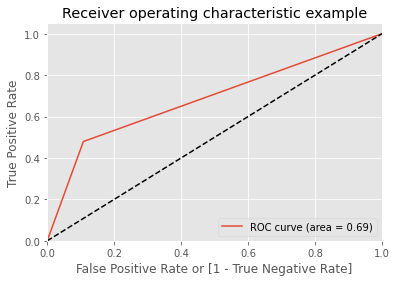

(array([0.        , 0.10798429, 1.        ]),
 array([0.        , 0.47938144, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [ ]:
# Use above function to plot ROC curve
draw_roc(y_pred_final.Churn, y_pred_final.predicted)


### Finding Optimal Cutoff Point'


Optimal cutoff probability is that probability where we get balanced sensitivity and specificity

In [ ]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]

# loop numbers and append churn probability to y_pred_final for different prob cutoff 
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)

    
# print  y_pred_final head
y_pred_final.head()

,CustID,Churn,churn_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,942,0,0.534503,1,1,1,1,1,1,1,0,0,0,0
1,3730,1,0.292735,0,1,1,1,0,0,0,0,0,0,0
2,1761,0,0.013463,0,1,0,0,0,0,0,0,0,0,0
3,2283,1,0.700441,1,1,1,1,1,1,1,1,1,0,0
4,1872,0,0.022563,0,1,0,0,0,0,0,0,0,0,0


Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.


In [ ]:
# Create an empty dataframe with columns 'prob','accuracy','sensi' and 'speci'
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy','speci','sensi'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

#iterate through num
for i in num:
    #calculate confusion metrics
    cm1 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final[i])
    
    #total in cm1
    total1= sum(sum(cm1))
    
    #Calculate accuracy
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    #calculate specificity
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    
    #calculate sensitivity
    sensi = cm1[1,1]/(cm1[1,1]+cm1[1,0])
    
    #append rows in cutoff_df with cutoff values, accuracy, sensitivity and specificity
    cutoff_df.loc[i] = [i, accuracy, speci, sensi]

# print cutoff_df 
print(cutoff_df)

     prob  accuracy     speci     sensi
0.0   0.0  0.275829  0.000000  1.000000
0.1   0.1  0.596209  0.460733  0.951890
0.2   0.2  0.681991  0.607330  0.878007
0.3   0.3  0.760190  0.797775  0.661512
0.4   0.4  0.768720  0.835079  0.594502
0.5   0.5  0.778199  0.892016  0.479381
0.6   0.6  0.782938  0.934555  0.384880
0.7   0.7  0.749763  0.994110  0.108247
0.8   0.8  0.724171  1.000000  0.000000
0.9   0.9  0.724171  1.000000  0.000000


<AxesSubplot:xlabel='prob'>

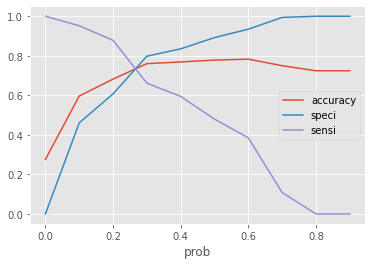

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','speci','sensi'])

### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.



In [ ]:
# Now lets get another column with final_predicted which has 0.3 cutoff probability

y_pred_final['final_predicted'] = y_pred_final.churn_prob.map(lambda x: 1 if x > 0.3 else 0)

In [ ]:
# print y_pred_final head
y_pred_final.head()

,CustID,Churn,churn_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,942,0,0.534503,1,1,1,1,1,1,1,0,0,0,0,1
1,3730,1,0.292735,0,1,1,1,0,0,0,0,0,0,0,0
2,1761,0,0.013463,0,1,0,0,0,0,0,0,0,0,0,0
3,2283,1,0.700441,1,1,1,1,1,1,1,1,1,0,0,1
4,1872,0,0.022563,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Let's check the overall accuracy now again
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.7601895734597156

In [ ]:
#Let's check the overall accuracy now again
metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted)

array([[1219,  309],
       [ 197,  385]], dtype=int64)

Though this approach of finding best cutoff probability is perfectly fine, but as you can see our error got increased when cutoff is 0.3. 


The reason may be the features which we used to predict. We need go back and check them again. Else we can even try out different classification problems. 






_______________________________